In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import statistics as st

In [21]:
data = pd.read_csv("../dataset/dataset.csv")

In [22]:
data=data.drop(columns='Unnamed: 0')
data.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_date,Time_order,Time_order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City,Time_taken_(min)
0,0x9012,RANCHIRES09DEL02,36.0,4.5,23.351058,85.325731,23.371058,85.345731,24-03-2022,11:25,11:35,Cloudy,High,1,Drinks,motorcycle,1.0,No,Metropolitian,25.0
1,0xb201,BANGRES11DEL03,37.0,4.7,12.934365,77.616155,13.024365,77.706155,25-03-2022,17:40,17:50,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,40.0
2,0xa657,VADRES06DEL01,25.0,4.9,22.312790,73.170283,22.352790,73.210283,19-03-2022,13:40,13:55,Cloudy,High,1,Drinks,scooter,1.0,No,Urban,30.0
3,0xab15,HYDRES05DEL02,28.0,4.5,17.433809,78.386744,17.563809,78.516744,10-03-2022,23:35,23:45,Sandstorms,Low,1,Drinks,motorcycle,0.0,No,Metropolitian,11.0
4,0x5be6,MYSRES13DEL02,22.0,4.5,12.310972,76.659264,12.390972,76.739264,10-03-2022,20:40,20:55,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,47.0
5,0x9fc4,MUMRES07DEL01,37.0,4.8,19.091458,72.827808,19.101458,72.837808,03-04-2022,10:45,10:50,Sunny,Low,1,Meal,scooter,0.0,No,Urban,19.0
6,0xc1c1,BHPRES15DEL01,21.0,4.8,23.234249,77.434007,23.244249,77.444007,15-02-2022,9:40,9:45,Windy,Low,1,Snack,scooter,1.0,No,Metropolitian,15.0
7,0xd7e3,GOARES09DEL02,35.0,4.2,15.303897,73.914336,15.323897,73.934336,13-02-2022,8:30,8:35,Windy,Low,0,Snack,motorcycle,1.0,No,Metropolitian,31.0
8,0xcb5a,KOLRES01DEL02,34.0,4.5,22.514688,88.393294,22.564688,88.443294,11-02-2022,18:35,18:40,Fog,Medium,2,Drinks,electric_scooter,1.0,No,Urban,18.0
9,0xa475,JAPRES06DEL02,22.0,5.0,26.911927,75.797282,26.931927,75.817282,01-04-2022,8:20,8:35,Fog,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20.0


In [23]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

ID : ['0x9012' '0xb201' '0xa657' ... '0xda5f' '0xdea0' '0x1917']
Delivery_person_ID : ['RANCHIRES09DEL02' 'BANGRES11DEL03' 'VADRES06DEL01' ... 'LUDHRES07DEL02'
 'ALHRES13DEL01' 'DEHRES02DEL01']
Delivery_person_Age : [36. 37. 25. 28. 22. 21. 35. 34. 39. 33. 38. 27. 26. 31. 30. 32. 29. 24.
 23. nan 20. 15. 50.]
Delivery_person_ratings : [4.5 4.7 4.9 4.8 4.2 5.  4.6 4.4 3.7 3.8 4.  4.3 4.1 nan 3.9 3.6 3.5 2.9
 1.  3.3 2.6 3.2 6.  2.5 3.4 3.1 2.7 2.8 3. ]
Restaurant_latitude : [ 23.351058  12.934365  22.31279   17.433809  12.310972  19.091458
  23.234249  15.303897  22.514688  26.911927  13.064181  22.753659
   0.        19.874449  22.308096  12.284747  13.049645  19.131141
  22.761226  26.892312  27.160934  11.006686  17.431477  13.045479
  26.47775   17.422819  26.492106  21.173343  22.727021  22.725748
  23.357804  23.353783  18.530963  22.552996  12.914264  21.170798
  12.972532  15.496162  11.024839  22.311358  22.311603  26.473698
  26.90519   17.45971   19.055831  22.75004   26.4716

In [24]:
data['Vehicle_condition'] = data['Vehicle_condition'].astype(object)

In [25]:
data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_date                      object
Time_order                      object
Time_order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition               object
Type_of_order                   object
Type_of_vehicle                 object
Multiple_deliveries            float64
Festival                        object
City                            object
Time_taken_(min)               float64
dtype: object

In [26]:
# Examine numerical features in the dataset
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Delivery_person_Age', 'Delivery_person_ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Multiple_deliveries',
       'Time_taken_(min)'],
      dtype='object')

In [27]:
# Examine categorical features in the dataset
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['ID', 'Delivery_person_ID', 'Order_date', 'Time_order',
       'Time_order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City'],
      dtype='object')

# Descriptive statistics (Thống kê mô tả)

Central tendencies (Hướng trung tâm):

In [28]:
#  Get various summary statistics that exclude NaN values
data[numeric_features.columns].describe()

,Delivery_person_Age,Delivery_person_ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Multiple_deliveries,Time_taken_(min)
count,43738.000000,43684.000000,45592.000000,45592.000000,45592.000000,45592.000000,44599.000000,45592.000000
mean,29.566967,4.633774,17.017603,70.231208,17.465070,70.845591,0.744680,26.294657
std,5.815113,0.334718,8.185155,22.883883,7.335160,21.119030,0.572469,9.383903
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,54.000000


In [29]:
print("Calculate mode value of features:")
for feature in data.columns:
    mode=st.mode(data[feature])
    print(f'{feature}:', mode)

Calculate mode value of features:
ID: 0x9012
Delivery_person_ID: JAPRES11DEL02
Delivery_person_Age: 35.0
Delivery_person_ratings: 4.8
Restaurant_latitude: 0.0
Restaurant_longitude: 0.0
Delivery_location_latitude: 0.13
Delivery_location_longitude: 0.13
Order_date: 15-03-2022
Time_order: nan
Time_order_picked: 21:30
Weather_conditions: Fog
Road_traffic_density: Low
Vehicle_condition: 2
Type_of_order: Snack
Type_of_vehicle: motorcycle
Multiple_deliveries: 1.0
Festival: No
City: Metropolitian
Time_taken_(min): 26.0


In [30]:
print("Calculate median value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].median())

Calculate median value of numerical features:
Delivery_person_Age: 30.0
Delivery_person_ratings: 4.7
Restaurant_latitude: 18.546947
Restaurant_longitude: 75.898497
Delivery_location_latitude: 18.633934
Delivery_location_longitude: 76.002574
Multiple_deliveries: 1.0
Time_taken_(min): 26.0


In [31]:
print("Calculate mean value of numerical features:")
for feature in numeric_features.columns:
    print(f'{feature}:', data[feature].mean())

Calculate mean value of numerical features:
Delivery_person_Age: 29.566966939503406
Delivery_person_ratings: 4.633774379635565
Restaurant_latitude: 17.01760288535269
Restaurant_longitude: 70.2312081685164
Delivery_location_latitude: 17.465069619626252
Delivery_location_longitude: 70.84559112282857
Multiple_deliveries: 0.744680373999417
Time_taken_(min): 26.29465695736094


Dispersion (Độ phân tán):

In [32]:
print("Standard deviation (Độ lệch chuẩn):")
data.std(numeric_only=True)

Standard deviation (Độ lệch chuẩn):


Delivery_person_Age             5.815113
Delivery_person_ratings         0.334718
Restaurant_latitude             8.185155
Restaurant_longitude           22.883883
Delivery_location_latitude      7.335160
Delivery_location_longitude    21.119030
Multiple_deliveries             0.572469
Time_taken_(min)                9.383903
dtype: float64

In [33]:
print("Variance (Phương sai):")
data.var(numeric_only=True)

Variance (Phương sai):


Delivery_person_Age             33.815542
Delivery_person_ratings          0.112036
Restaurant_latitude             66.996759
Restaurant_longitude           523.672093
Delivery_location_latitude      53.804579
Delivery_location_longitude    446.013435
Multiple_deliveries              0.327720
Time_taken_(min)                88.057634
dtype: float64

# Shape of data

In [34]:
data.skew(numeric_only=True)

Delivery_person_Age            0.018710
Delivery_person_ratings       -2.493534
Restaurant_latitude           -1.361552
Restaurant_longitude          -3.220115
Delivery_location_latitude    -0.701032
Delivery_location_longitude   -2.956343
Multiple_deliveries            0.324659
Time_taken_(min)               0.485931
dtype: float64

In [35]:
data.kurt(numeric_only=True)

Delivery_person_Age            -1.058291
Delivery_person_ratings        15.670627
Restaurant_latitude             3.713624
Restaurant_longitude           10.302713
Delivery_location_latitude      0.264299
Delivery_location_longitude     7.104193
Multiple_deliveries             0.909204
Time_taken_(min)               -0.310860
dtype: float64

In [36]:
def plot_skewness_kutosis(feature):
    g = sns.displot(data=data, x=feature, kind='kde', color='darkred')
    for ax in g.axes.ravel():
        ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % data[feature].skew(), fontsize=10, verticalalignment='top', horizontalalignment='right')
        ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % data[feature].kurt(), fontsize=10, verticalalignment='top', horizontalalignment='right')

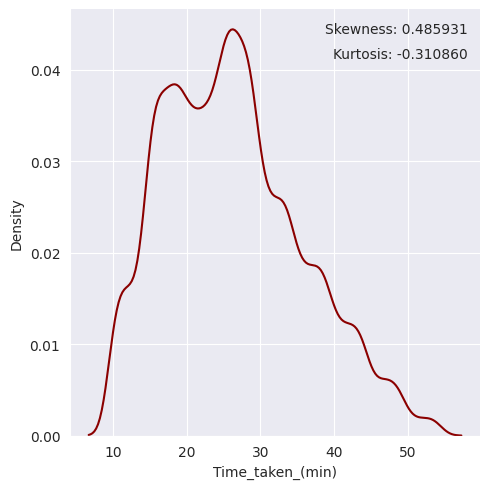

In [37]:
plot_skewness_kutosis('Time_taken_(min)')

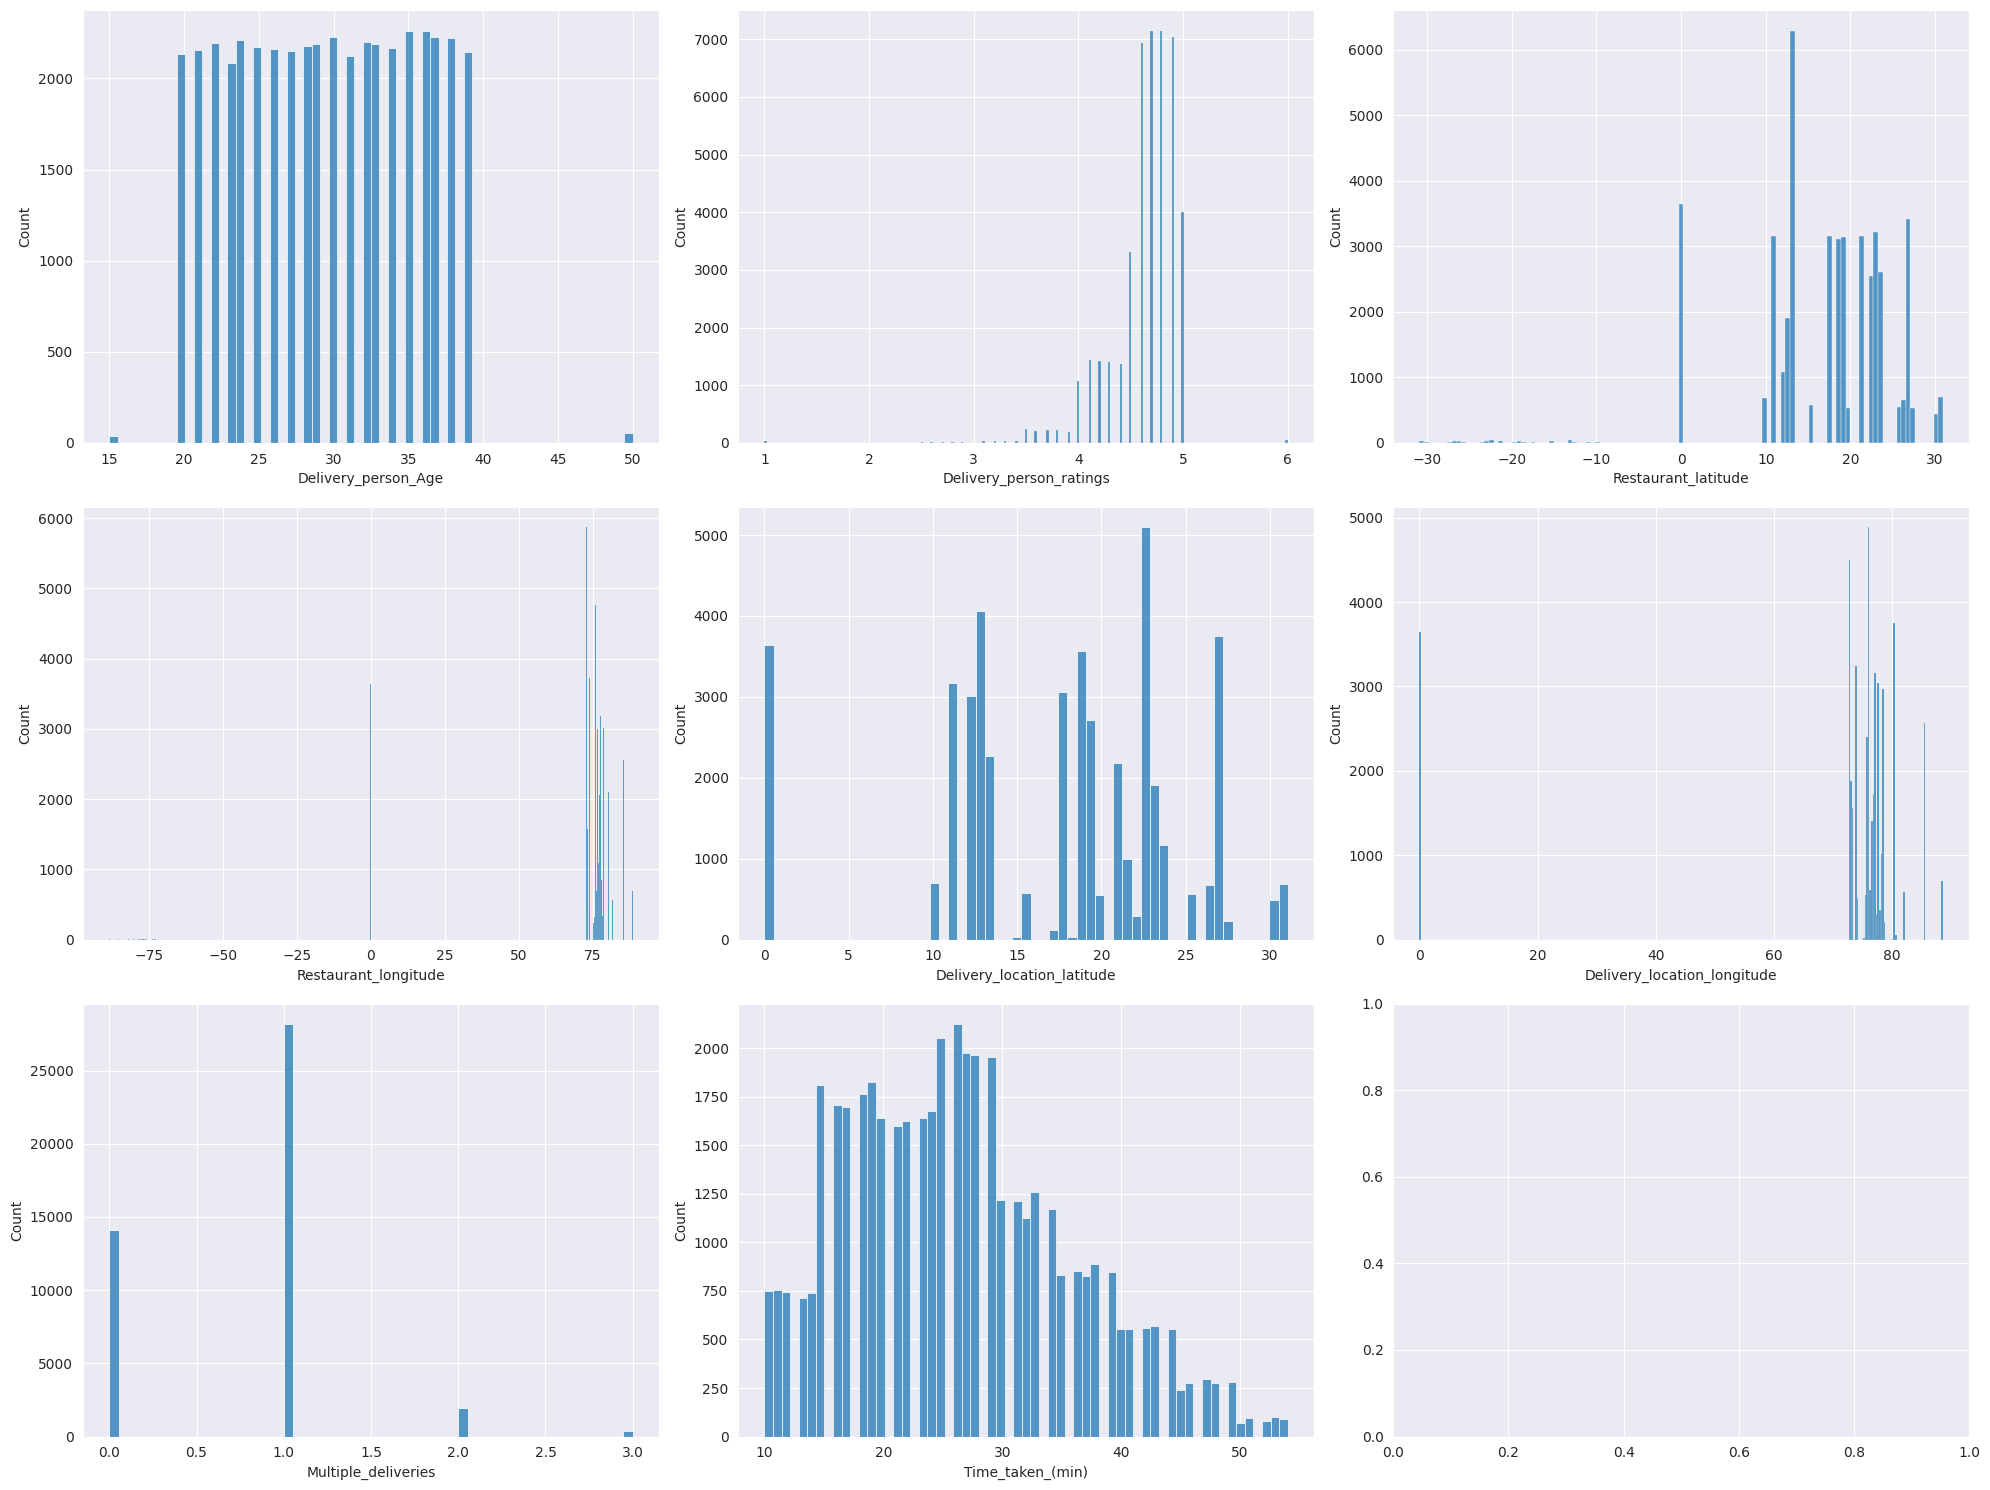

In [38]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.histplot(data = data, x = 'Delivery_person_Age', ax=axes[0, 0])
sns.histplot(data = data, x = 'Delivery_person_ratings', ax=axes[0, 1])
sns.histplot(data = data, x = 'Restaurant_latitude', ax=axes[0, 2])
sns.histplot(data = data, x = 'Restaurant_longitude', ax=axes[1, 0])
sns.histplot(data = data, x = 'Delivery_location_latitude', ax=axes[1, 1])
sns.histplot(data = data, x = 'Delivery_location_longitude', ax=axes[1, 2])
sns.histplot(data = data, x = 'Multiple_deliveries', ax=axes[2, 0])
sns.histplot(data = data, x = 'Time_taken_(min)', ax=axes[2, 1])
plt.tight_layout()
plt.show()

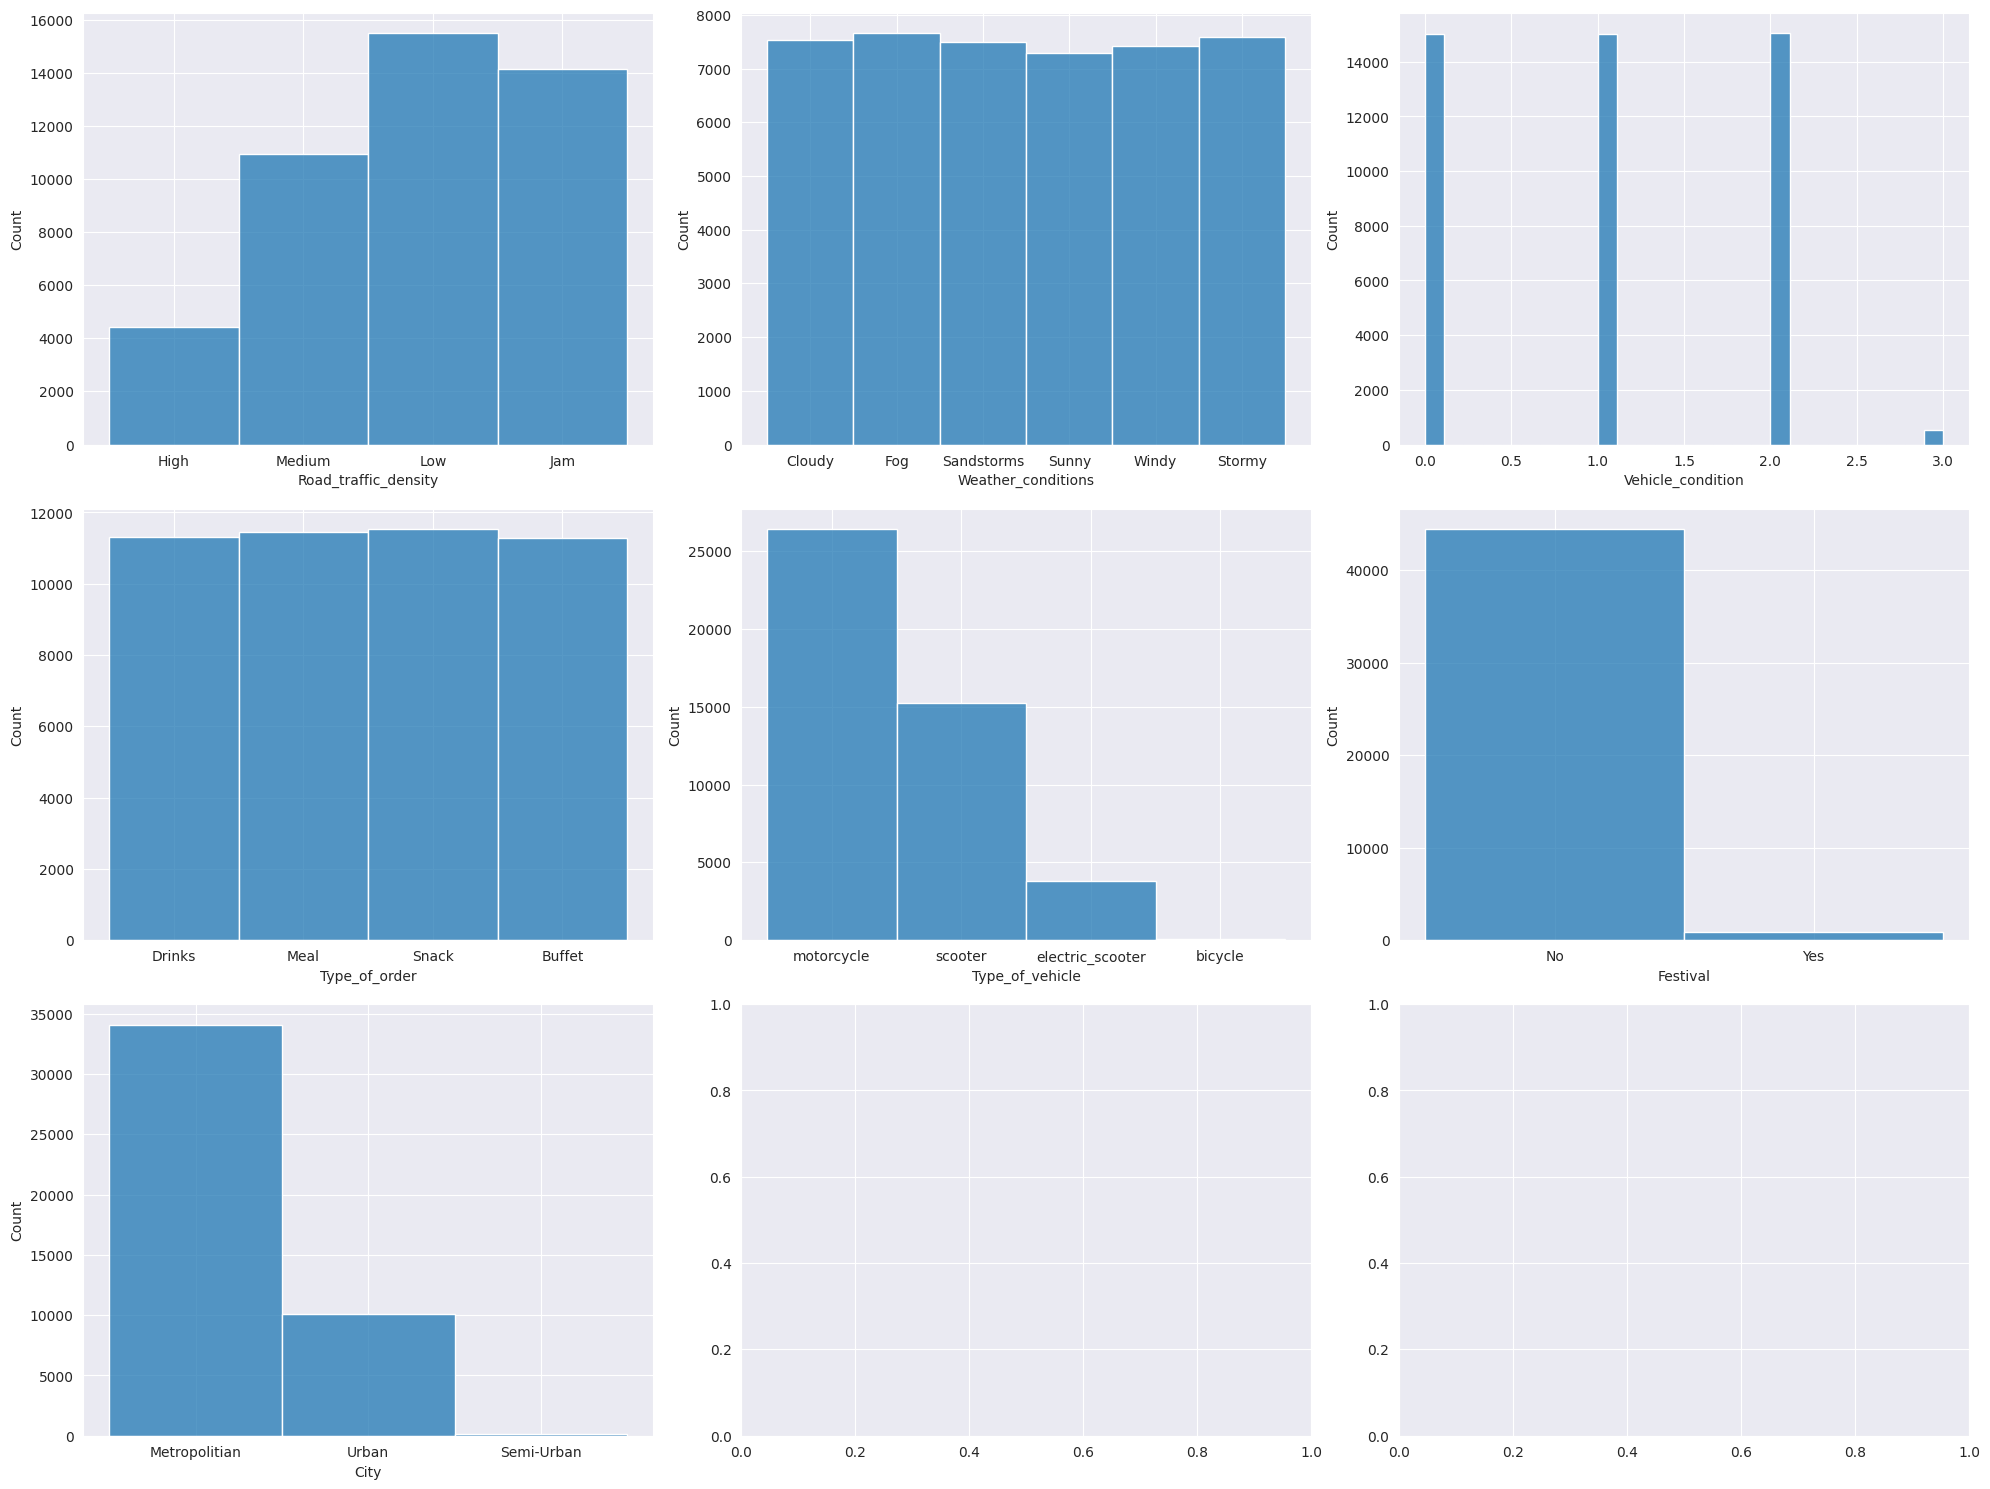

In [39]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.histplot(data = data, x = 'Road_traffic_density', ax=axes[0, 0])
sns.histplot(data = data, x = 'Weather_conditions', ax=axes[0, 1])
sns.histplot(data = data, x = 'Vehicle_condition', ax=axes[0, 2])
sns.histplot(data = data, x = 'Type_of_order', ax=axes[1, 0])
sns.histplot(data = data, x = 'Type_of_vehicle', ax=axes[1, 1])
sns.histplot(data = data, x = 'Festival', ax=axes[1, 2])
sns.histplot(data = data, x = 'City', ax=axes[2, 0])
plt.tight_layout()
plt.show()

<AxesSubplot: >

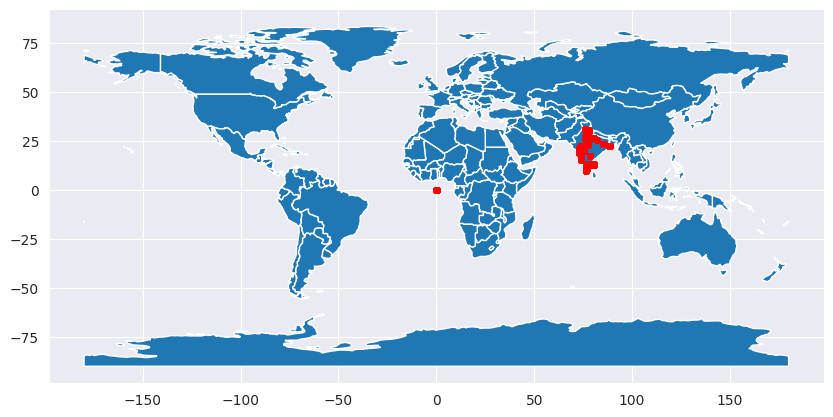

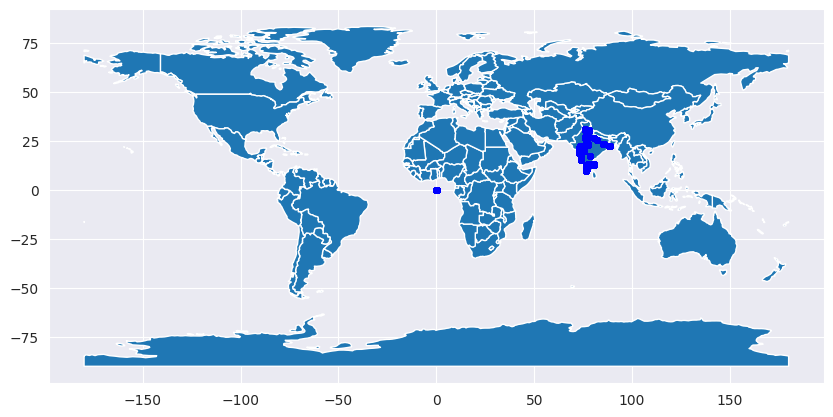

In [40]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

restaurant_geometry = [Point(xy) for xy in zip(data['Restaurant_longitude'], data['Restaurant_latitude'])]
restaurant_gdf = GeoDataFrame(data, geometry=restaurant_geometry)

delivery_geometry = [Point(xy) for xy in zip(data['Delivery_location_longitude'], data['Delivery_location_latitude'])]
delivery_gdf = GeoDataFrame(data, geometry=delivery_geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
restaurant_gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)
delivery_gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='blue', markersize=15)

# Correlation

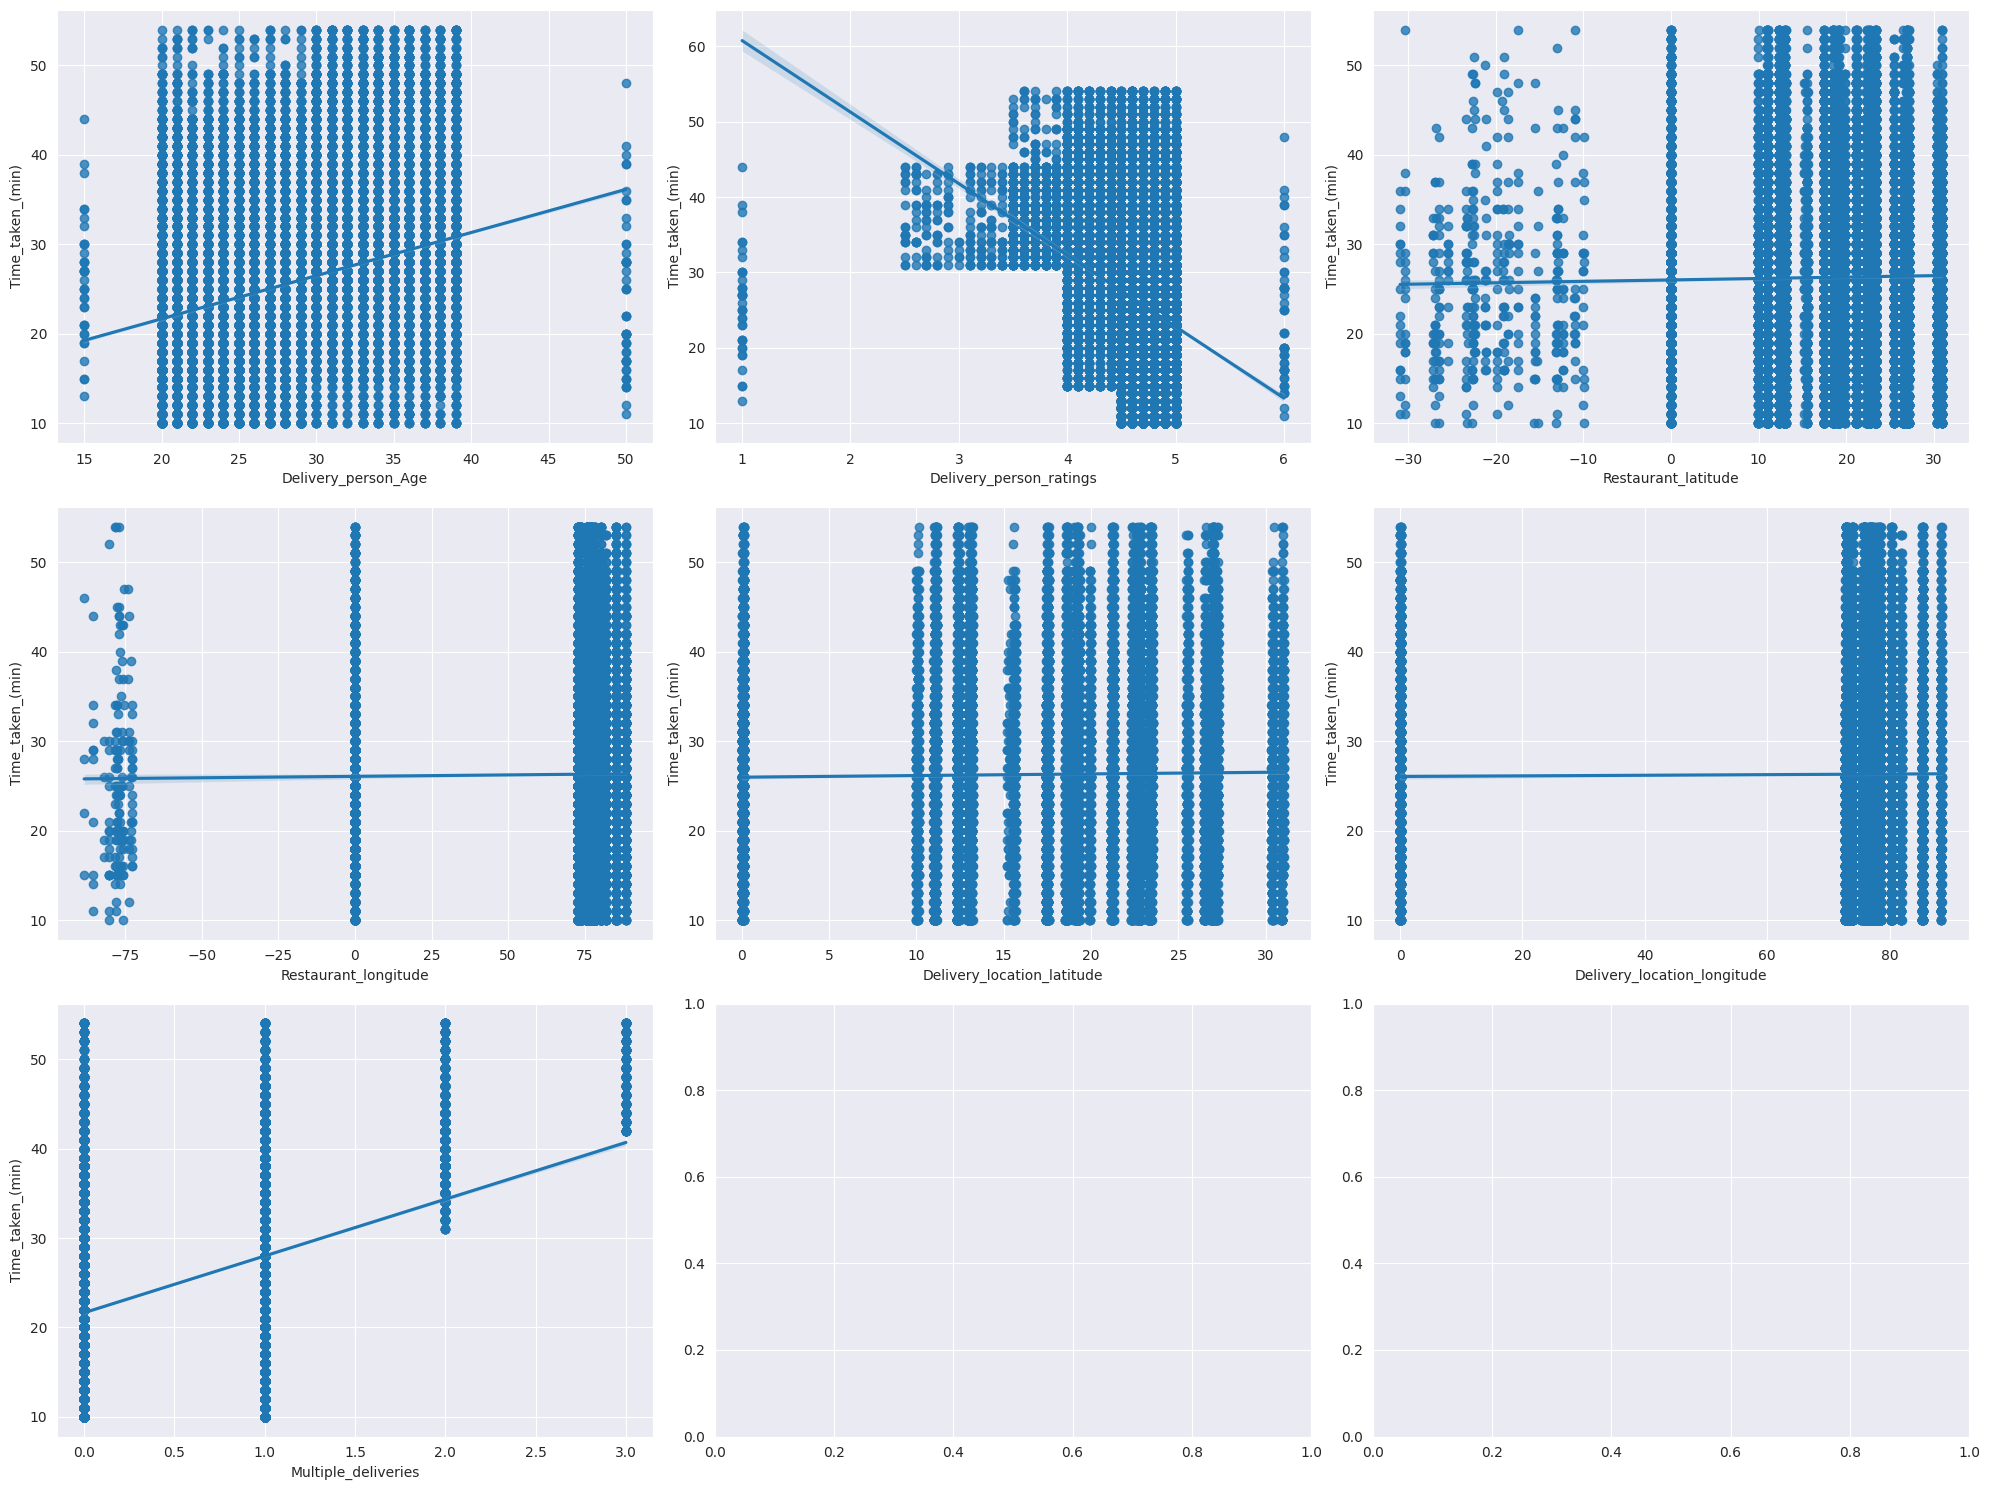

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.regplot(x=data["Delivery_person_Age"], y=data["Time_taken_(min)"], ax=axes[0,0])
sns.regplot(x=data["Delivery_person_ratings"], y=data["Time_taken_(min)"], ax=axes[0,1])
sns.regplot(x=data["Restaurant_latitude"], y=data["Time_taken_(min)"], ax=axes[0,2])
sns.regplot(x=data["Restaurant_longitude"], y=data["Time_taken_(min)"], ax=axes[1,0])
sns.regplot(x=data["Delivery_location_latitude"], y=data["Time_taken_(min)"], ax=axes[1,1])
sns.regplot(x=data["Delivery_location_longitude"], y=data["Time_taken_(min)"], ax=axes[1,2])
sns.regplot(x=data["Multiple_deliveries"], y=data["Time_taken_(min)"], ax=axes[2,0])
plt.tight_layout()
plt.show()

/tmp/ipykernel_24117/221951862.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _ = sns.heatmap(data.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


Text(0.5, 1, 'Correlation of Features with Time Taken')

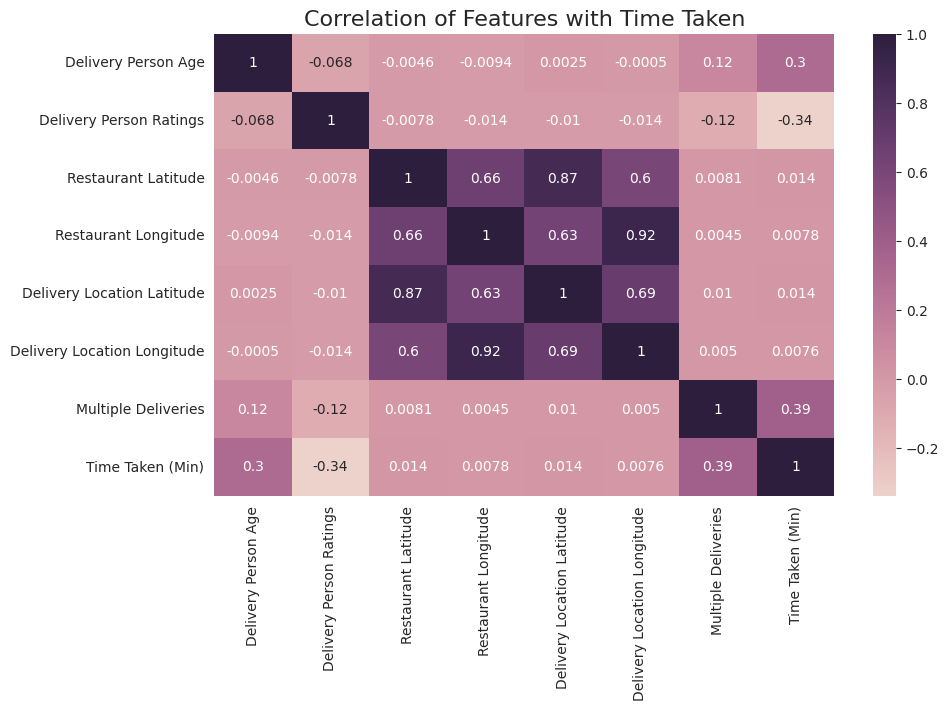

In [42]:
h_labels = [x.replace('_', ' ').title() for x in list(data.select_dtypes(include=['number']).columns.values)]
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(data.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)
plt.title('Correlation of Features with Time Taken',y=1,size=16)

In [43]:
correlation = numeric_features.corr()
print(correlation['Time_taken_(min)'].sort_values(ascending = False),'\n')

Time_taken_(min)               1.000000
Multiple_deliveries            0.387051
Delivery_person_Age            0.299487
Delivery_location_latitude     0.014247
Restaurant_latitude            0.013984
Restaurant_longitude           0.007823
Delivery_location_longitude    0.007626
Delivery_person_ratings       -0.338788
Name: Time_taken_(min), dtype: float64 



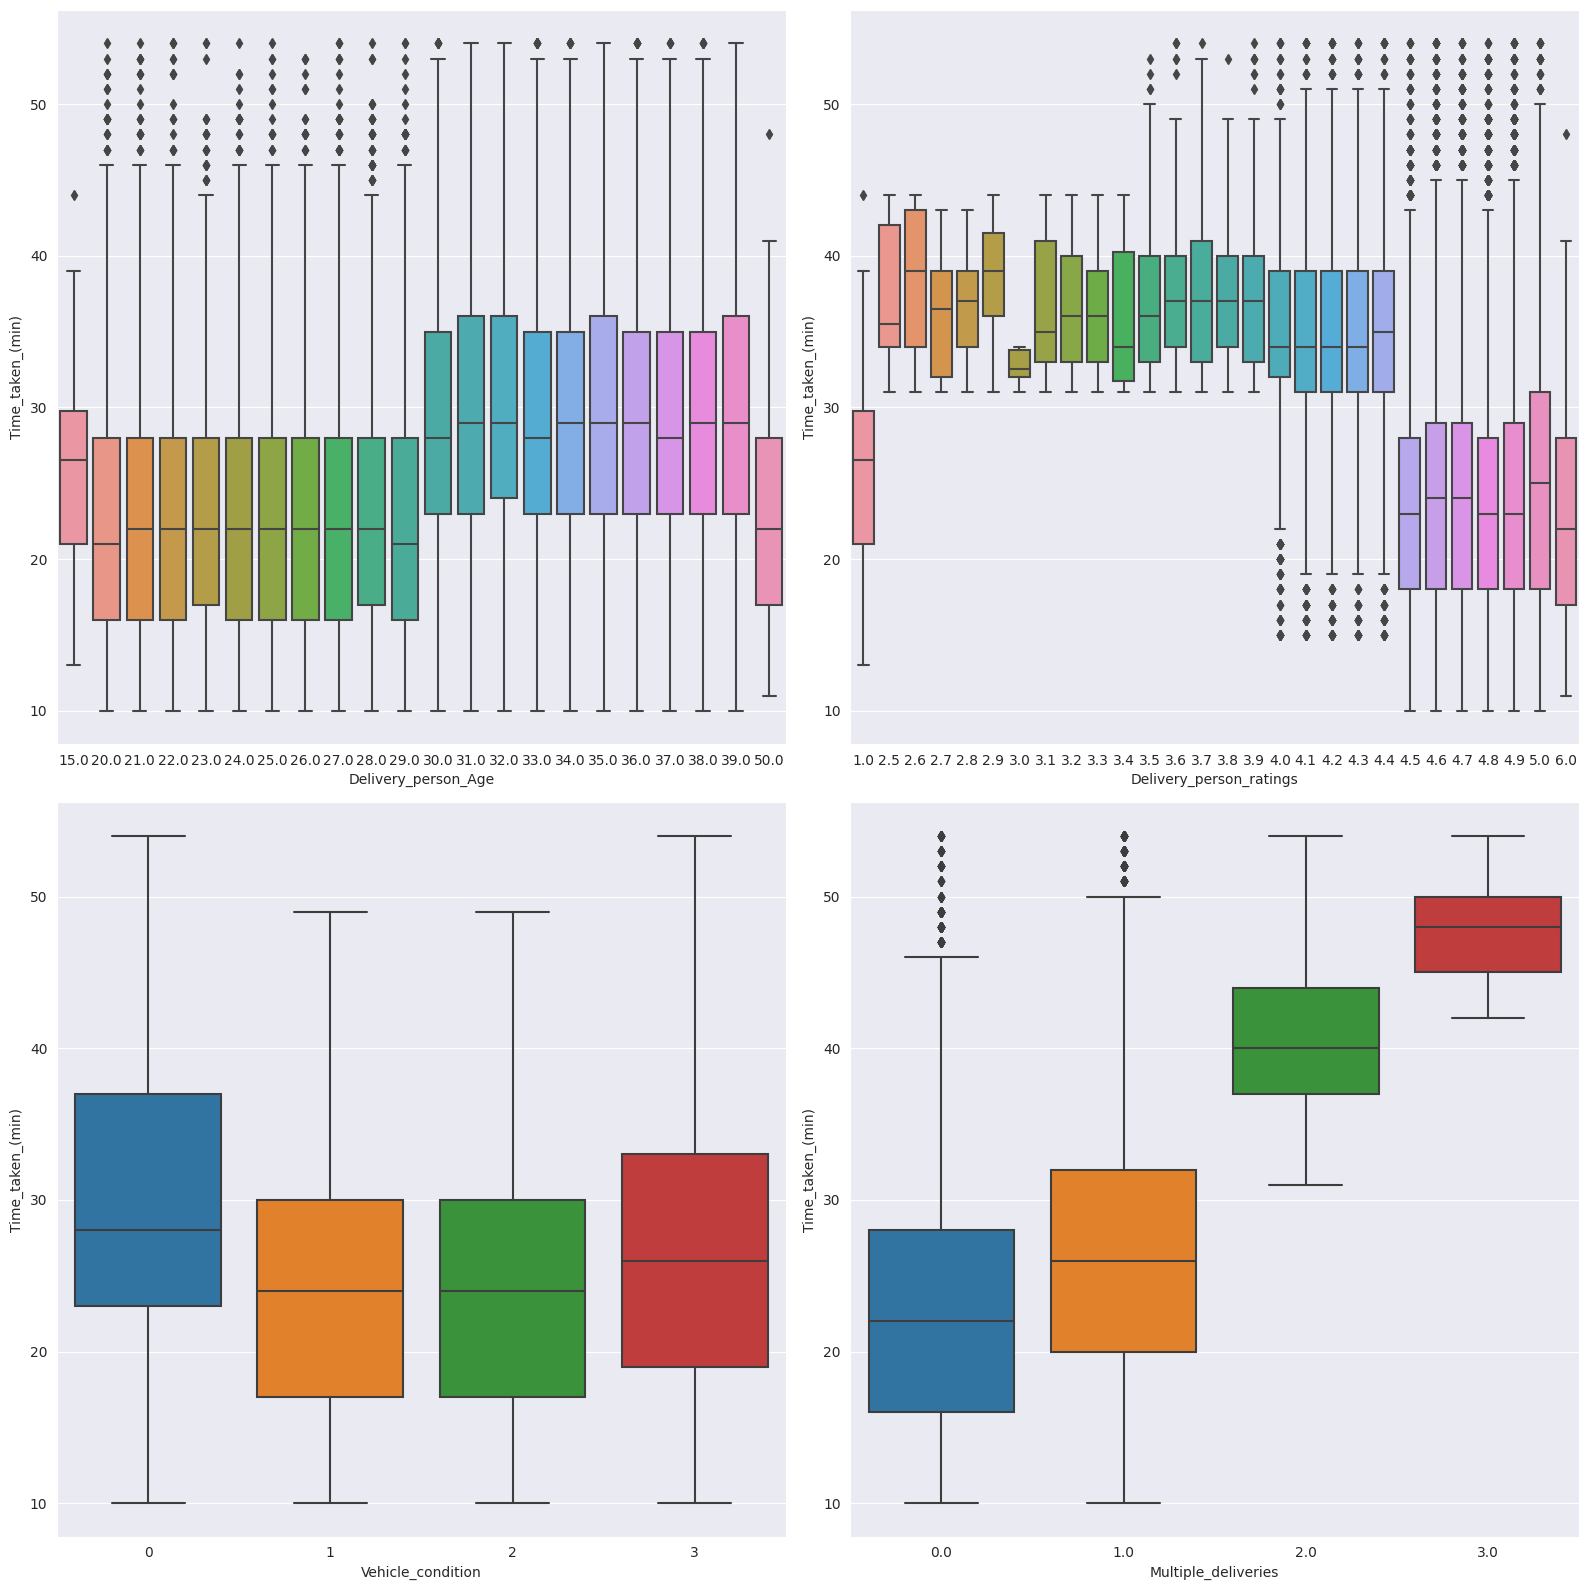

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

sns.boxplot(x="Delivery_person_Age", y = "Time_taken_(min)", data=data, ax=axes[0,0])
sns.boxplot(x="Delivery_person_ratings", y = "Time_taken_(min)", data=data, ax=axes[0,1])
sns.boxplot(x="Vehicle_condition", y = "Time_taken_(min)", data=data, ax=axes[1,0])
sns.boxplot(x="Multiple_deliveries", y = "Time_taken_(min)", data=data, ax=axes[1,1])
plt.tight_layout()
plt.show()

# Check for missing values

In [45]:
data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_date                        0
Time_order                     1731
Time_order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Multiple_deliveries             993
Festival                        228
City                           1200
Time_taken_(min)                  0
geometry                          0
dtype: int64

# Visualizing the missing values

<AxesSubplot: >

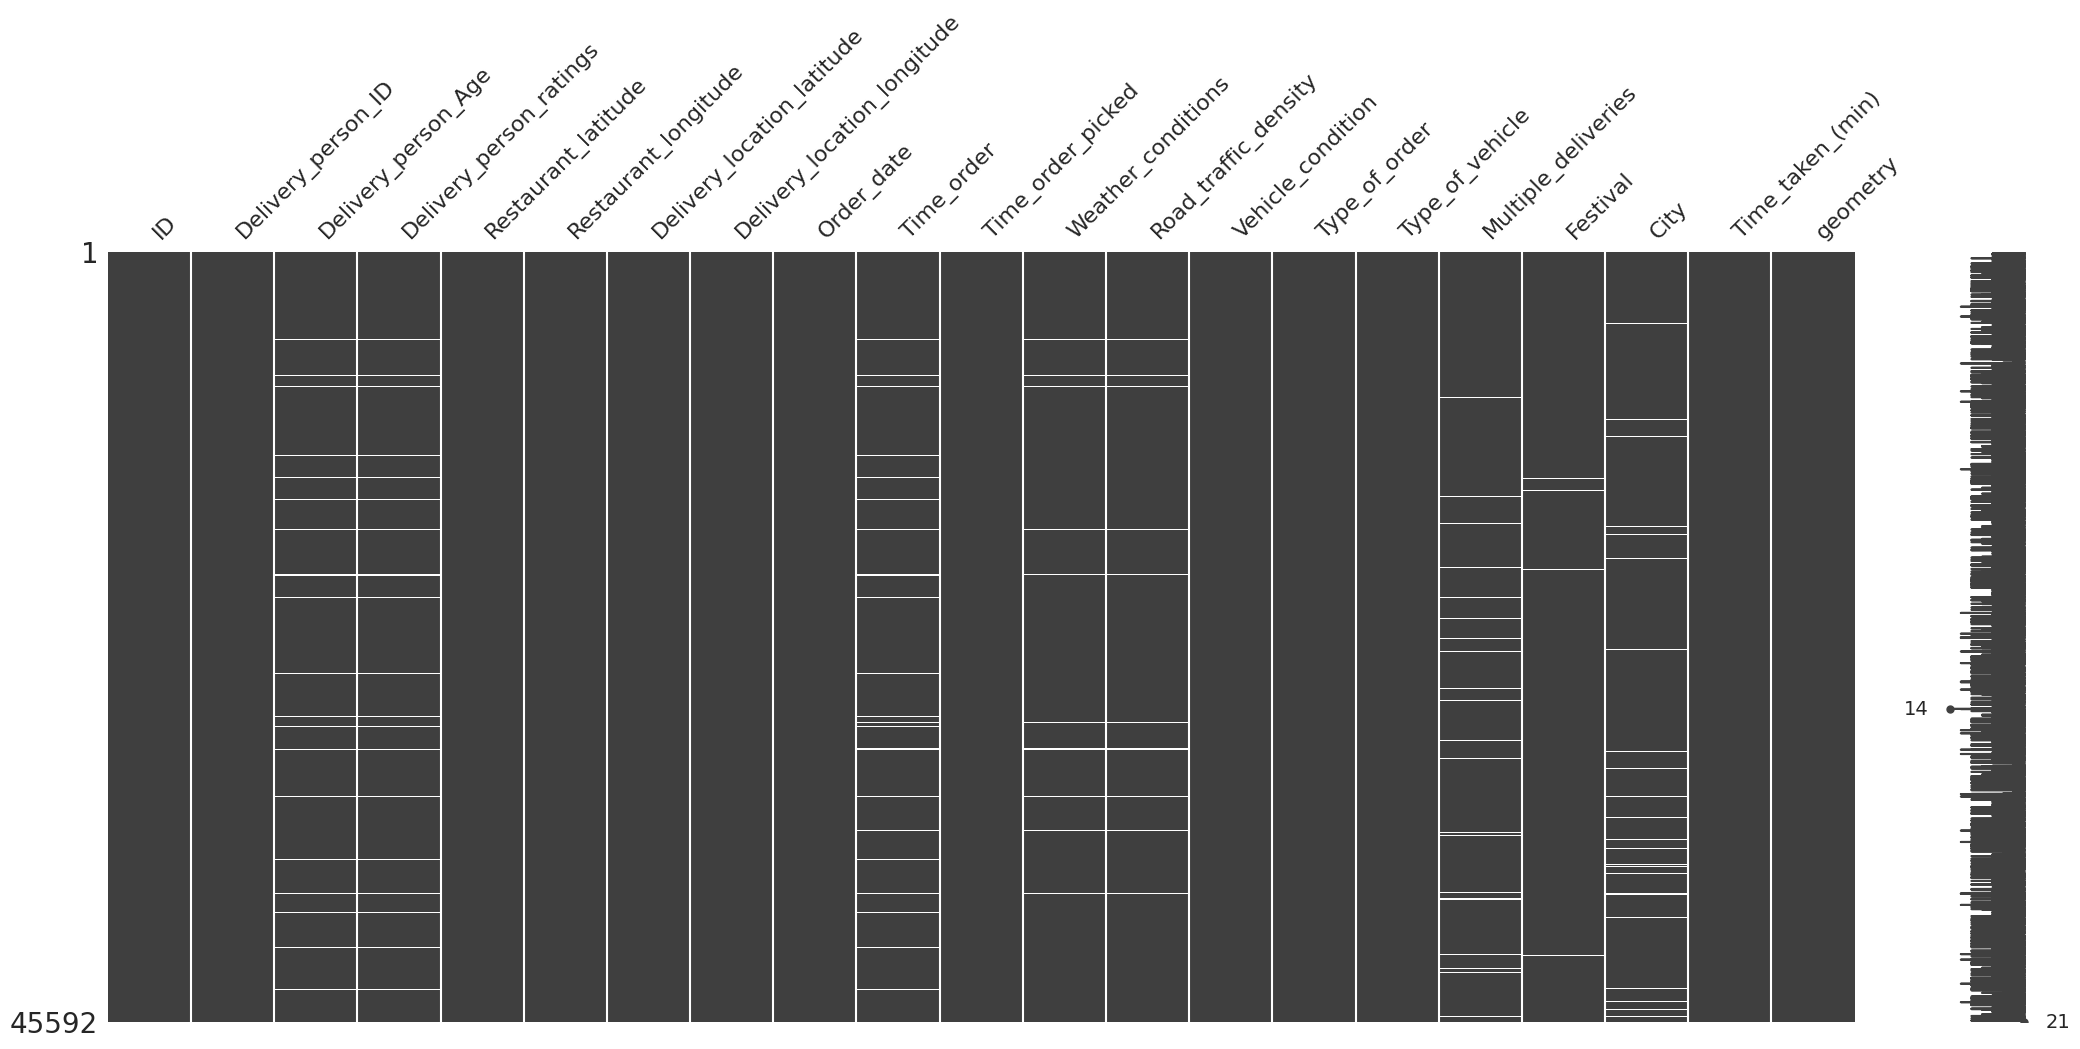

In [46]:
msno.matrix(data)

<AxesSubplot: >

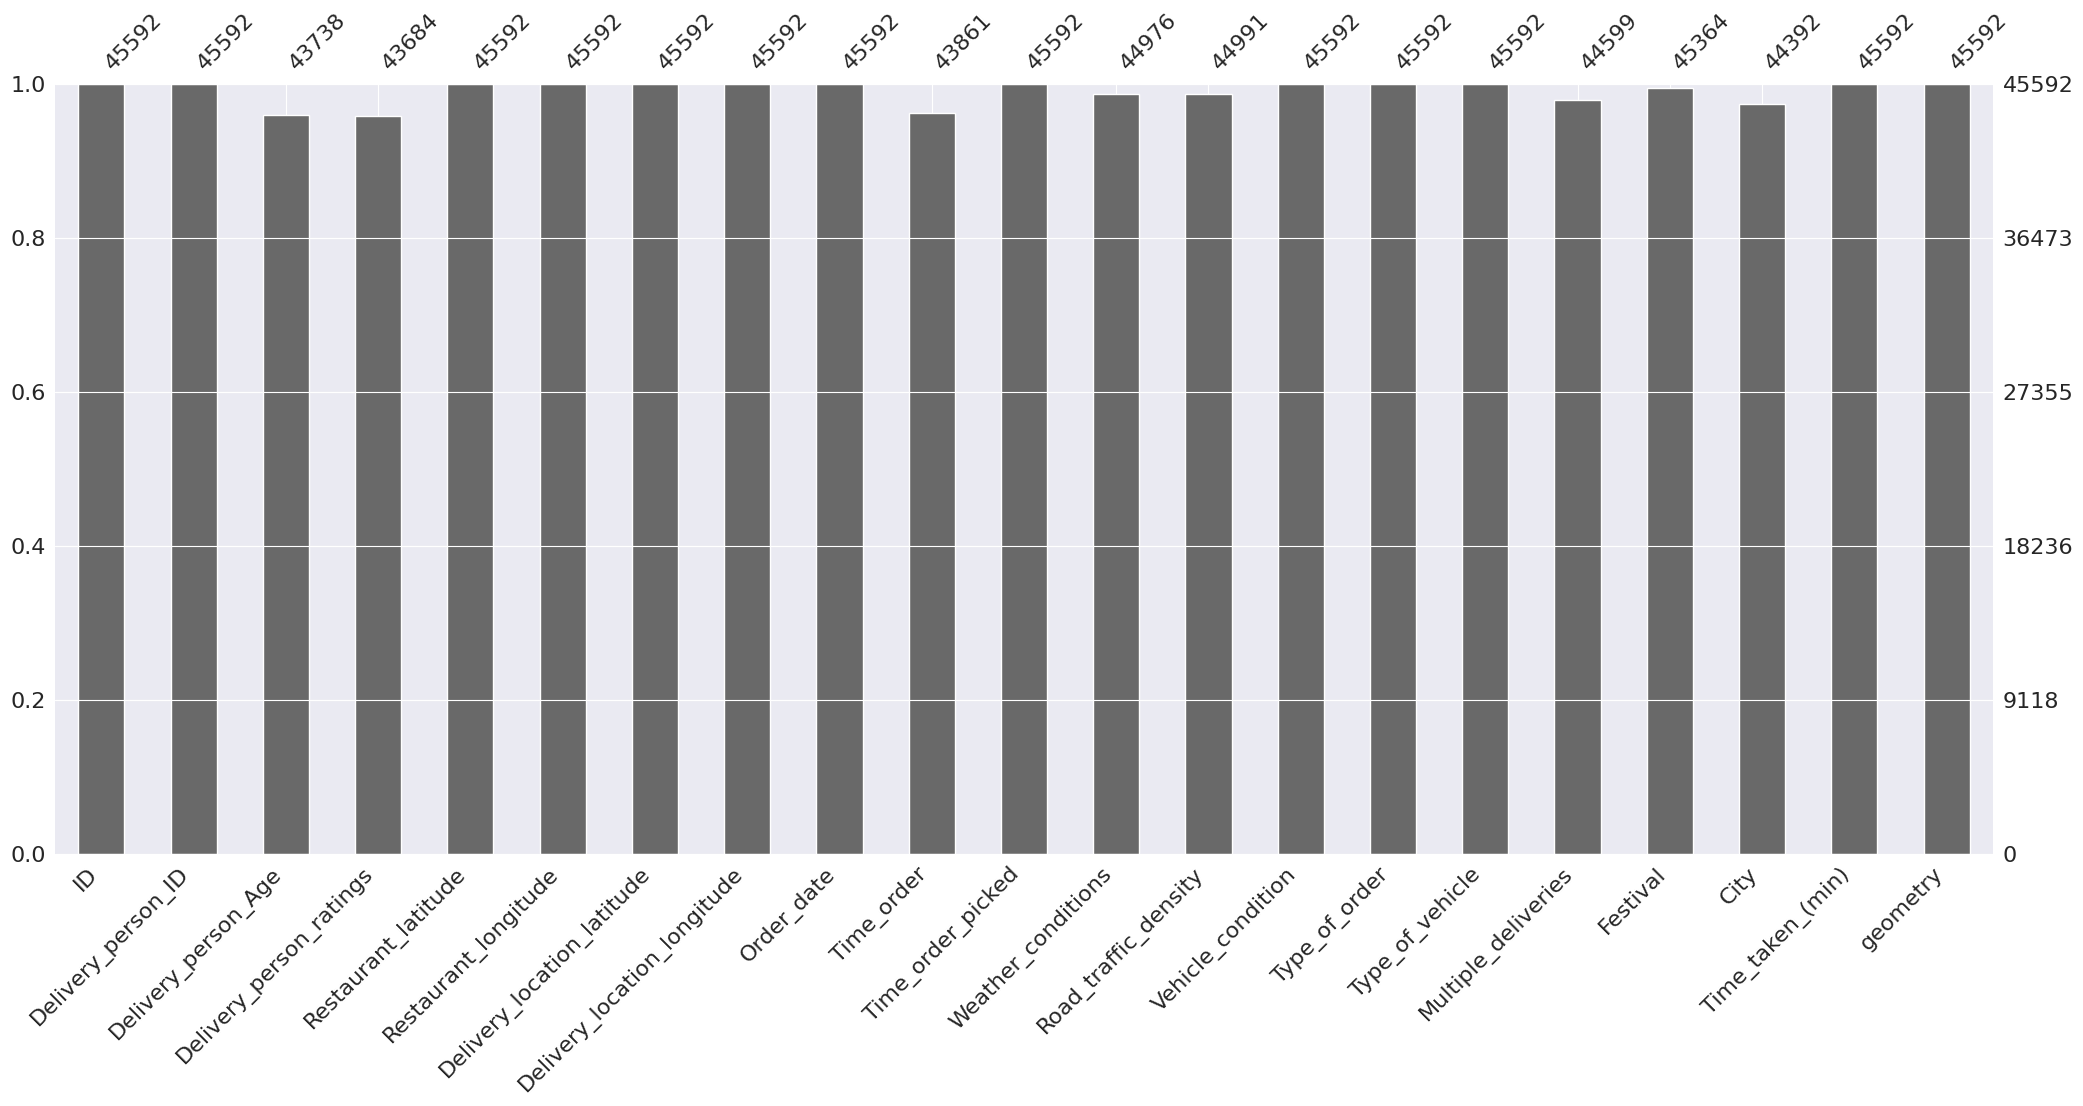

In [47]:
msno.bar(data)

<AxesSubplot: >

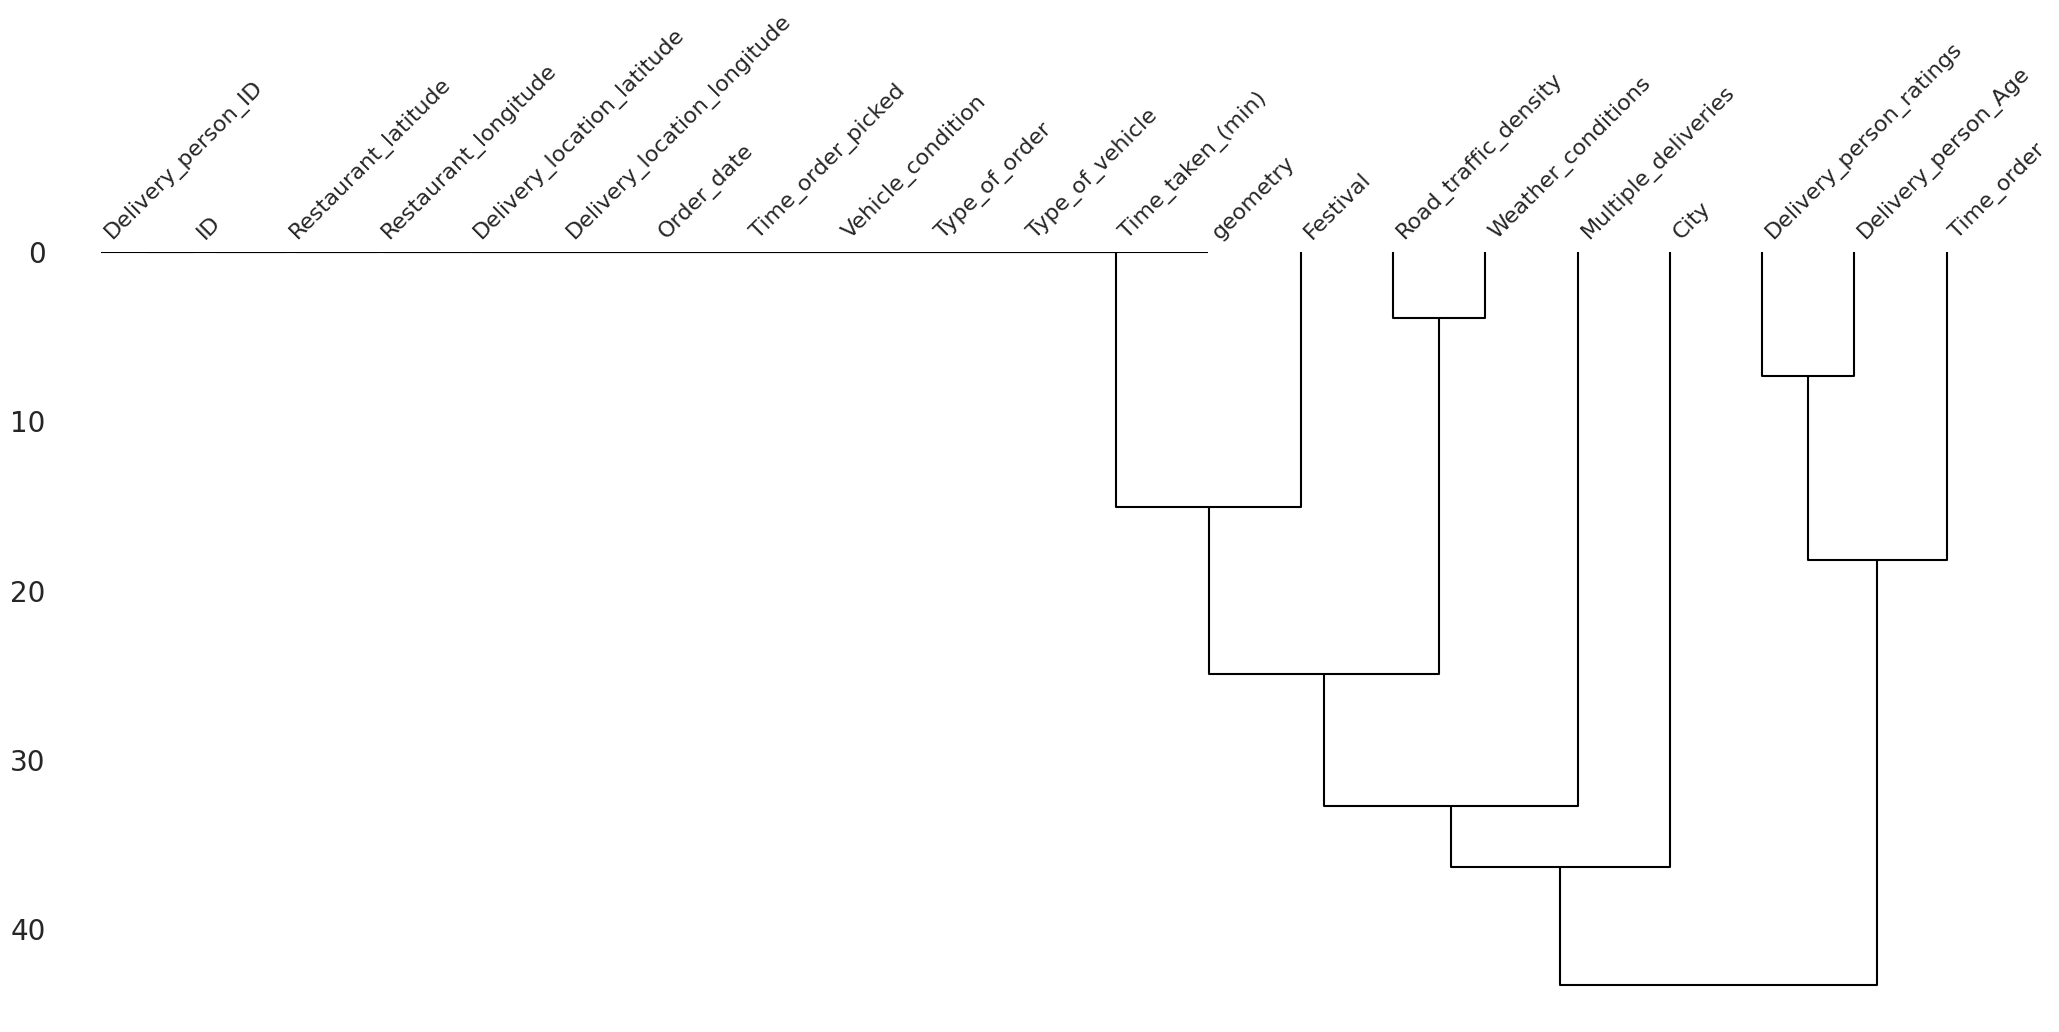

In [48]:
msno.dendrogram(data)